Пример: сгенерируем 2D-набор данных, содержащий 4 разных больших объекта,
а затем применим алгоритм k-средних, чтобы увидеть результат.


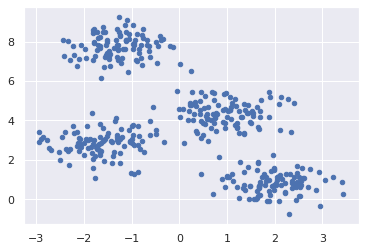

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s= 20)
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


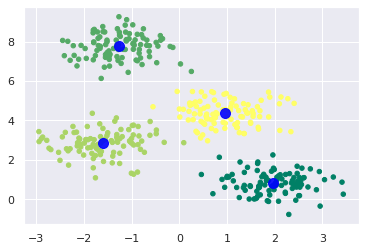

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c= y_kmeans, s= 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
plt.show()

1.1.1 Пример: проведем кластеризацию K-средних к набору простых цифр. K-means
попытается идентифицировать похожие цифры

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


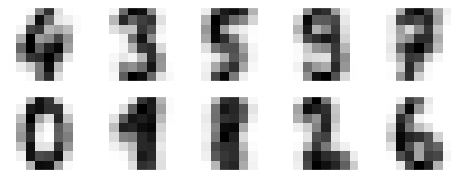

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

fig, ax= plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)


Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
 [[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]
Cluster labels:
 [0 0 0 0 2 1 1 1 2 1]


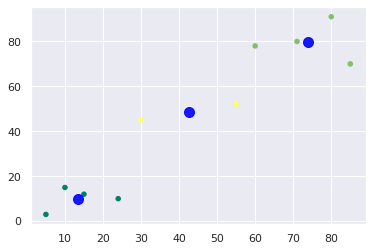

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd

import numpy as np
from sklearn.cluster import KMeans

X = np.array([[5,3],
             [10,15],
             [15,12],
             [24,10],
             [30,45],
             [85,70],
             [71,80],
             [60,78],
             [55,52],
             [80,91]])

k = 3

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels:\n", kmeans.labels_)


plt.scatter(X[:,0], X[:,1], c= y_kmeans, s= 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9)
plt.show()

Задание: Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


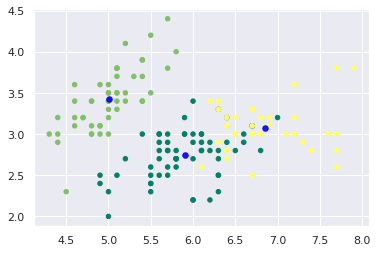

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans


iris = datasets.load_iris()
X = iris.data


k = 3 
kmeans = KMeans(n_clusters=k, random_state=111).fit(X)


y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c= y_pred, s= 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c = 'blue', s = 30, alpha = 0.9)
plt.show()


1.2.2 Пример

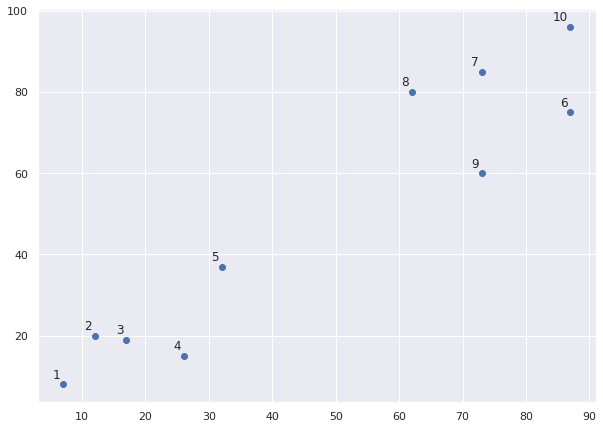

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96],]
)
labels = range(1, 11)

plt.figure(figsize = (10,7))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0], X[:,1], label = 'True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
  plt.annotate(
      label, xy = (x,y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom'
  )
plt.show()


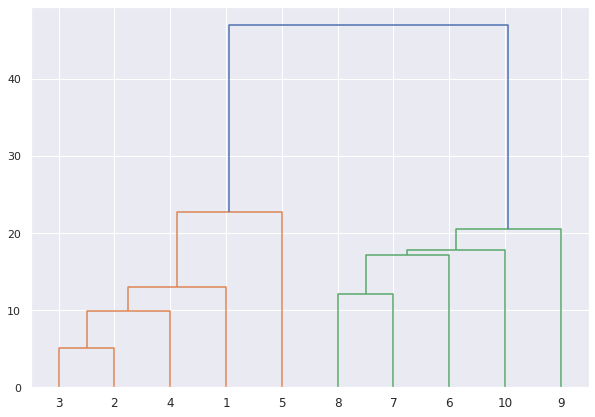

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
labelList = range(1,11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', labels = labelList, 
          distance_sort = 'descending', show_leaf_counts = True)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


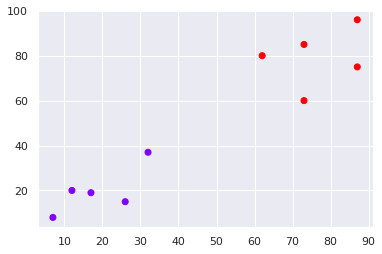

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c  =cluster.labels_, cmap = 'rainbow')

Пример: В этом примере мы выполним иерархическую кластеризацию реальных
данных и посмотрим, как ее можно использовать для решения реальной
проблемы. Выполним кластеризацию данных по набору
https://raw.githubusercontent.com/lucko515/clusteringpython/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

data = customer_data.iloc[:, 3:5]. values



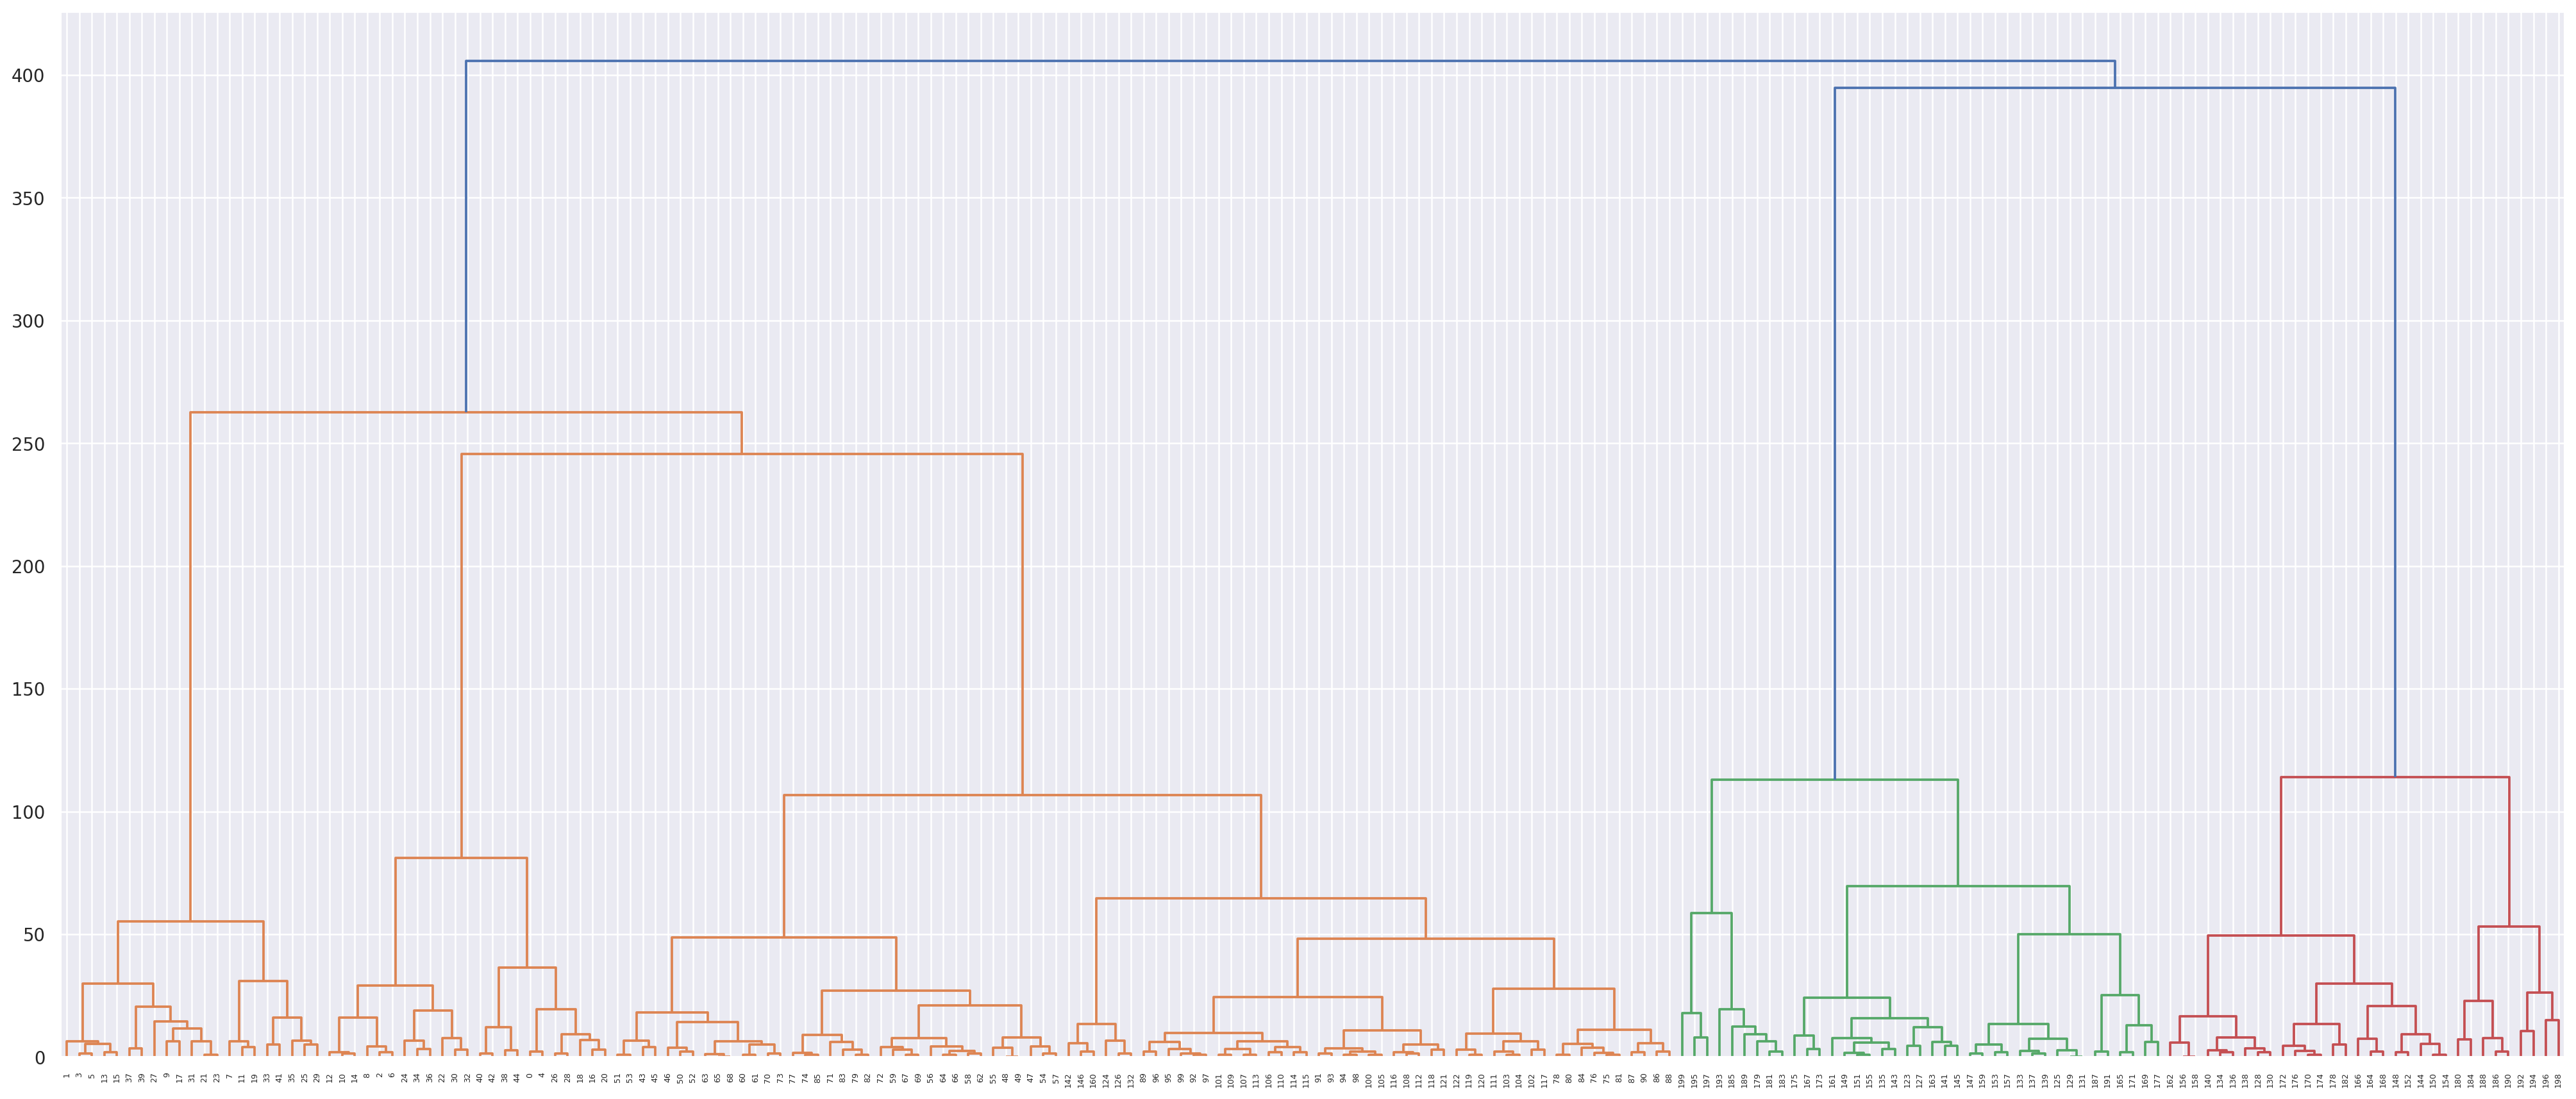

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt



plt.figure(figsize = (28,12), dpi = 180)
dend = dendrogram(linkage(data, method = 'ward'))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

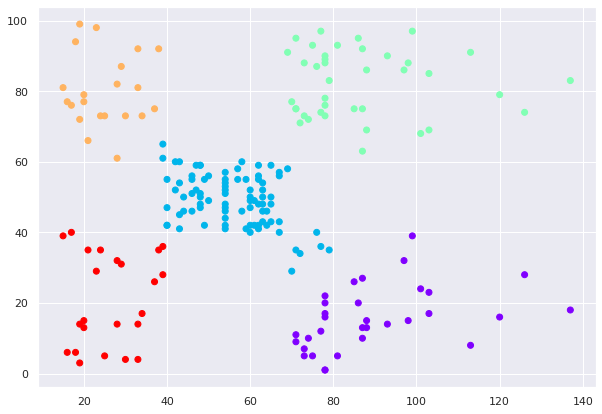

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(data[:, 0], data[:,1], c  = cluster.labels_, cmap = 'rainbow')

Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data


X = X[:, [1, 3]]


model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 0 0 2 2
 0 2 0 2 2 0 2 2 0 2 0 0 0 2 0 0 0 2 0 0 2 2 0 0 2 2 0 0 2 2 2 0 2 2 2 0 2
 2 0]


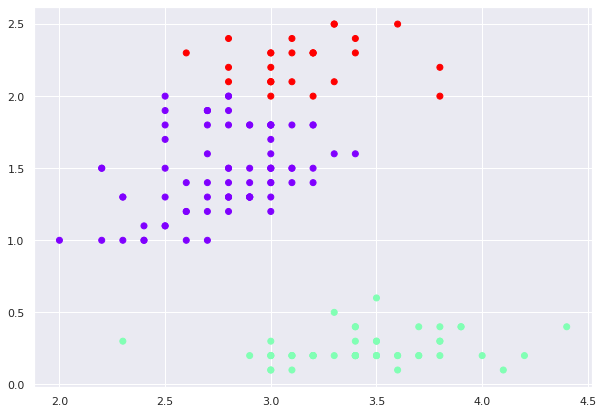

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X[:, 0], X[:,1], c  = model.labels_, cmap = 'rainbow')